## 소개
- 오브젝트(타워, 용, 바론 ..etc)의 중요성에 대한 탐색
- 블루팀에 대해서 주로 분석
- inhibitors(억제기), towers(타워), dragons(드래곤), barons(바론), heralds(정령)을 data로 사용
- 출처 : [What Objectives Lead to Victory?](https://www.kaggle.com/mikesch/what-objectives-lead-to-victory)

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings 
warnings.filterwarnings('ignore') # warning 메시지 제거

In [3]:
match_ovr = pd.read_csv('data/LeagueofLegends.csv')
match_obj = pd.read_csv('data/objValues.csv')

In [4]:
def obj_count(x, b_obj_type, r_obj_type):
    # data setup
    x = match_obj.loc[match_obj['ObjType'].isin([b_obj_type, r_obj_type])]
    
    # blue obj
    b_obj = x.loc[x['ObjType'] == b_obj_type]
    x[b_obj_type] = b_obj.count(axis=1) -2
    
    # red obj
    r_obj = x.loc[x['ObjType'] == r_obj_type]
    x[r_obj_type] = r_obj.count(axis=1) -2
    
    x = x.groupby('MatchHistory').sum()[[b_obj_type, r_obj_type]]
    
    return(x)

In [7]:
#calling function obj_count & joining data into single df

match_stats = obj_count(match_obj, 'bInhibs', 'rInhibs')

for i,j in [('bTowers','rTowers'), ('bDragons','rDragons'), ('bBarons','rBarons'), ('bHeralds','rHeralds')]:
    match_stats = match_stats.join(obj_count(match_obj, i, j))

for i,j,k in [('bInhibs','rInhibs','Inhibs_Dif'), ('bTowers','rTowers', 'Tower_Dif'), ('bDragons','rDragons', 'Dragon_Dif'), ('bBarons','rBarons','Baron_Dif'), ('bHeralds','rHeralds', 'Heralds_Dif')]:
    match_stats[k] = match_stats[i] - match_stats[j]

df1 = match_stats.join(match_ovr[['MatchHistory', 'bResult']].set_index('MatchHistory')).astype(int)

In [9]:
df1.head()

,bInhibs,rInhibs,bTowers,rTowers,bDragons,rDragons,bBarons,rBarons,bHeralds,rHeralds,Inhibs_Dif,Tower_Dif,Dragon_Dif,Baron_Dif,Heralds_Dif,bResult
MatchHistory,,,,,,,,,,,,,,,,
http://matchhistory.br.leagueoflegends.com/pt/#match-details/ESPORTSTMNT03/100070?gameHash=e991db1141e3a449,2,0,10,3,3,1,1,0,0,0,2,7,2,1,0,1
http://matchhistory.br.leagueoflegends.com/pt/#match-details/ESPORTSTMNT03/100072?gameHash=39492a263961999d,1,4,10,9,0,5,1,2,1,0,-3,1,-5,-1,1,1
http://matchhistory.br.leagueoflegends.com/pt/#match-details/ESPORTSTMNT03/100080?gameHash=eab634857ae83824,2,0,9,0,3,1,1,0,0,0,2,9,2,1,0,1
http://matchhistory.br.leagueoflegends.com/pt/#match-details/ESPORTSTMNT03/100081?gameHash=e526f380996cf4e0,0,3,3,10,2,2,0,2,0,1,-3,-7,0,-2,-1,0
http://matchhistory.br.leagueoflegends.com/pt/#match-details/ESPORTSTMNT03/100282?gameHash=2c496934d110a2b6,0,2,1,10,0,2,0,1,0,1,-2,-9,-2,-1,-1,0


In [10]:
# 블루팀/레드팀 오브젝트 유형 빈도수
r_b = pd.Series(df1['bTowers'].map(str)+',' + df1['rTowers'].map(str), name='bTowers').to_frame()

for i,j in [('bDragons', 'rDragons'), ('bInhibs', 'rInhibs'), ('bBarons', 'rBarons'), ('bHeralds', 'rHeralds')]:
    r_b = r_b.join(pd.Series(df1[i].map(str)+','+df1[j].map(str), name=i).to_frame())

In [11]:
r_b.head()

,bTowers,bDragons,bInhibs,bBarons,bHeralds
MatchHistory,,,,,
http://matchhistory.br.leagueoflegends.com/pt/#match-details/ESPORTSTMNT03/100070?gameHash=e991db1141e3a449,"10,3","3,1","2,0","1,0","0,0"
http://matchhistory.br.leagueoflegends.com/pt/#match-details/ESPORTSTMNT03/100072?gameHash=39492a263961999d,"10,9","0,5","1,4","1,2","1,0"
http://matchhistory.br.leagueoflegends.com/pt/#match-details/ESPORTSTMNT03/100080?gameHash=eab634857ae83824,"9,0","3,1","2,0","1,0","0,0"
http://matchhistory.br.leagueoflegends.com/pt/#match-details/ESPORTSTMNT03/100081?gameHash=e526f380996cf4e0,"3,10","2,2","0,3","0,2","0,1"
http://matchhistory.br.leagueoflegends.com/pt/#match-details/ESPORTSTMNT03/100282?gameHash=2c496934d110a2b6,"1,10","0,2","0,2","0,1","0,1"


In [16]:
def some_plots(obj_type, b_obj, r_obj, obj_name, des_kil):
    fig = plt.figure(figsize=(10,10))
    
    ax1 = plt.subplot2grid((2,4), (0,0), colspan=3)
    sns.barplot(x=obj_type, y='bResult', data=df1, ax=ax1)
    ax1.set_title("Win Percent by {}".format(obj_name), fontsize=18)
    ax1.set_ylabel("win Percentage")
    ax1.set_xlabel("")
    
    ax2 = plt.subplot2grid((2,4), (0,3))
    sns.boxplot(df1[obj_type], color="#4daf8b", orient="v")
    ax2.set_title("Boxplot : {}".format(obj_name), fontsize=18)
    ax2.set_ylabel("")
    ax2.set_xlabel("")
    
    ax3 = plt.subplot2grid((2,4), (1,0), colspan=2)
    ax3.scatter(x=df1[b_obj], y=df1[r_obj], s=r_b[b_obj].value_counts()*.5, edgecolors='face')
    ax3.set_title('Blue vs. Red')
    ax3.set_xlabel('{} by Blue'.format(des_kil))
    ax3.set_ylabel('{} by Red'.format(des_kil))
    ax3.grid(axis='x')

    ax4 = plt.subplot2grid((2,4), (1,2), colspan=2)
    sns.distplot(df1[obj_type], ax=ax4, norm_hist=True, axlabel=None)
    ax4.set_title('{} Distribution (%)'.format(obj_name))
    ax4.set_xlabel('')
    ax4.grid(axis='x')

    plt.tight_layout;
    
    return (ax1,ax2,ax3,ax4)

#### 탐색 : 타워
- 승리 %가 5 이상부터는 항상 이긴 것으로 나옴
- 블루팀이 타워의 이점을 많이 가져감(boxplot의 median 값 참고)
- 대다수의 게임에서 한쪽 팀이 타워에서 항상 우위를 가짐(4번째 plot 참고)
- scatter plot은 블루팀과 레드팀의 타워 차이를 보여줌. 원크기는 발생빈도를 나타냄(3번째 plot 참고)

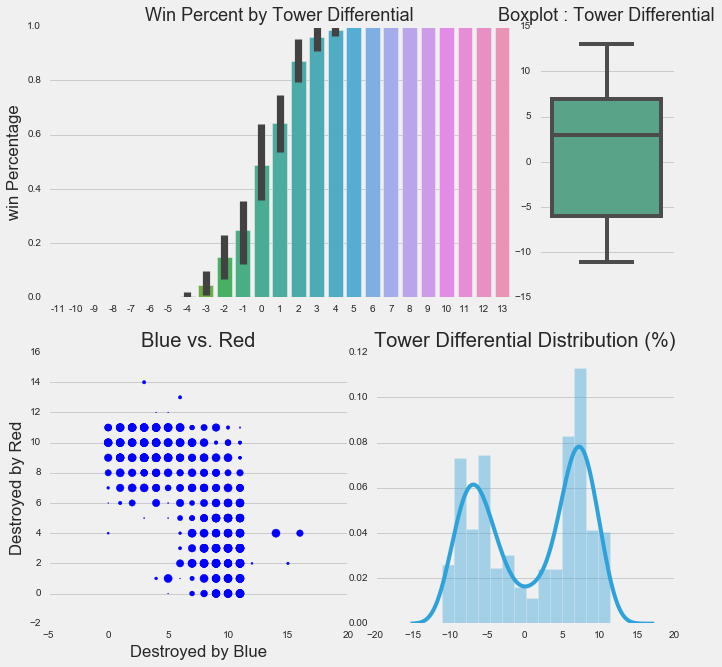

In [17]:
some_plots('Tower_Dif', 'bTowers', 'rTowers', 'Tower Differential', 'Destroyed');

#### 관측 : 억제기
- 억제기는 승리의 강력한 지표
    - 특이한 점은 4 또는 5 억제기를 파괴한 경우 승리횟수가 낮아지는 경향이 보임
- 블루가 레드보다 더 많은 억제기를 파괴??(해석이...)
- 타워와 달리 억제기 분포는 제로에 가까움

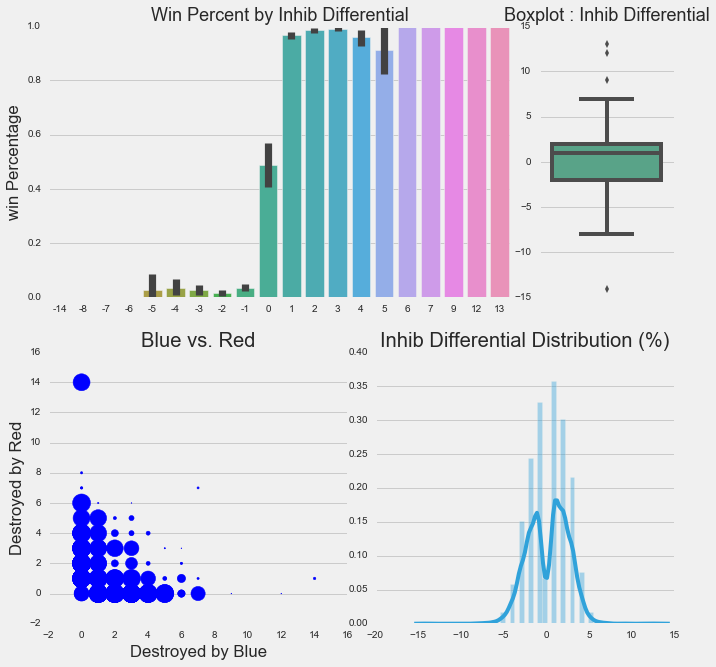

In [19]:
some_plots('Inhibs_Dif', 'bInhibs', 'rInhibs', 'Inhib Differential', 'Destroyed');

##### 관측 : 드래곤
- 드래곤은 승리의 강력한 지표는 아니지만 중요한 오브젝트
    - 억제기와 유사하게 4,5 에서 승률이 떨어지는 것으로 보임. 드래곤에 과한 집착을 보여서 그런 것일까?
- 블루/레드팀 용의 분포는 억제기와 유사하지만 약간 넓음(4번째 그래프)
- 블루/레드팀의 게임별 드래곤을 죽인 횟수를 나타냄(3번째 그래프)
    - 신기한건 블루팀쪽에서 드래곤을 얻을 수 있는 경로가 더 쉬움. 하지만 이 데이터에서는 지원되지 않음.

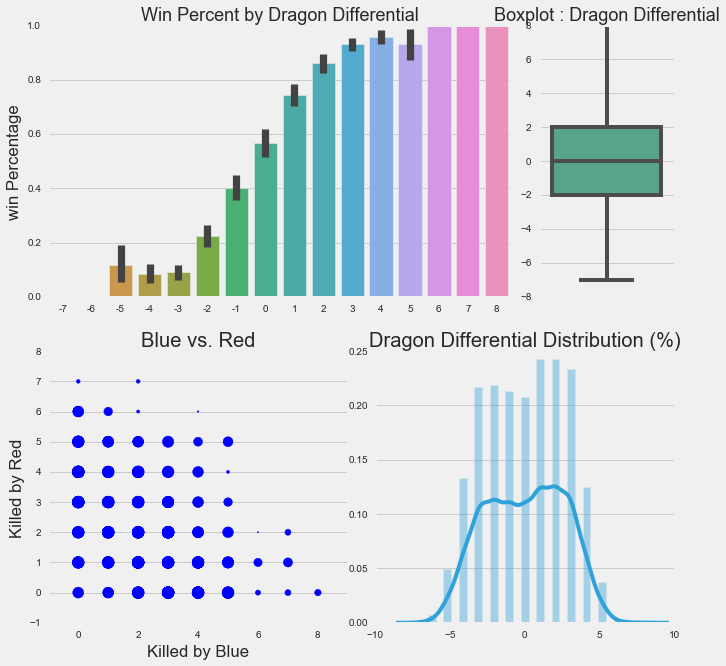

In [20]:
some_plots('Dragon_Dif', 'bDragons', 'rDragons', 'Dragon Differential', 'Killed');

In [21]:
#quick look at StDev
for i in ['Tower_Dif', 'Inhibs_Dif','Dragon_Dif']:
    print('{0} Stanard Deviations: {1:.2f}'.format(i, df1[i].std()))

Tower_Dif Stanard Deviations: 6.91
Inhibs_Dif Stanard Deviations: 2.32
Dragon_Dif Stanard Deviations: 2.61


##### 관측 : 바론
- 바론은 횟수에 따라 승률이 크게 달라짐(첫번째 그래프)
    - 4 에서는 승률이 떨어짐
- 블루/레드 팀의 게임간 바론을 죽인 횟수를 나타냄(세번째 그래프)
- 블루/레드 팀의 바론 분포는 매우 타이트함 - 당연한 결과(네번째 그래프)

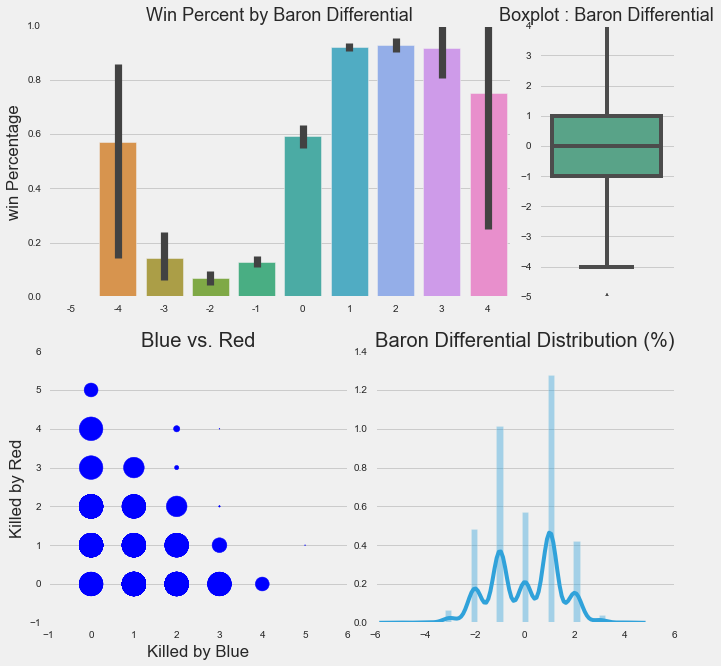

In [22]:
some_plots('Baron_Dif', 'bBarons', 'rBarons', 'Baron Differential', 'Killed');

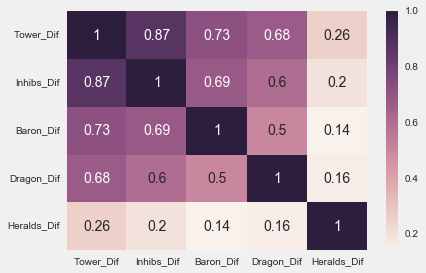

In [23]:
dif_list = ['Tower_Dif','Inhibs_Dif','Baron_Dif','Dragon_Dif','Heralds_Dif']
sns.heatmap(df1[dif_list].corr(), annot=True)

##### 모델링
- 타워와 억제기 차이가 매우 높은 상관관계가 있는 경우 타워만 사용 하는 것이 좋음(어차피 타워를 깨고 억제기를 깨기 때문??? -자의적 해석)
- logistic regression, plot coefficient values 및 여러 시나리오 활용 예정

In [25]:
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold

In [26]:
dif_list.remove('Inhibs_Dif')

x = normalize(df1[dif_list].values)
y = df1['bResult'].values

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int32 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


In [32]:
kf = StratifiedKFold(y, n_folds=5, random_state=None) # y : kfold로 분할할 샘플, n_folds : folds 수(최소값:2), random_state : 난수생성 형태
lr = LogisticRegression(C=3, random_state=None) # C : 정규화 강도의 역행으로 값이 작을수록 강한 정규화가 지정

scores = []

for tr,cv in kf:
    model = lr.fit(x[tr], y[tr])
    probs = model.predict_proba(x[cv])
    scores.append(lr.score(x[cv], y[cv]))
    
np.mean(scores)

0.97503425844876879

각 오브젝트 별 모델계수 확인 - 어떤 오브젝트가 해당 모델에서 가장 중요한지 확인 하는 것으로 보임

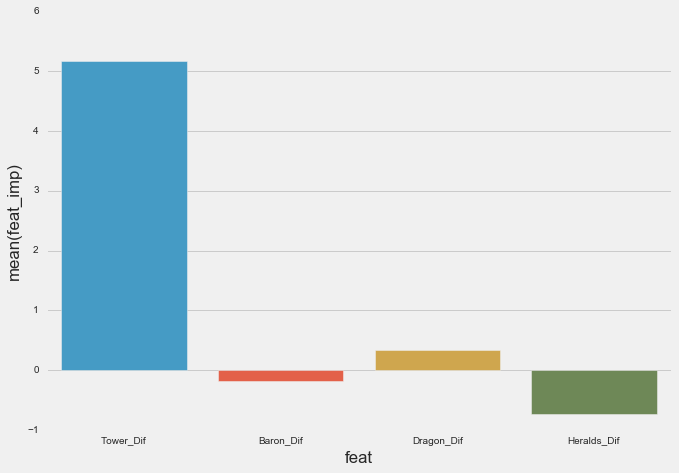

In [37]:
feat_imp = pd.DataFrame({'feat':dif_list,
                         'feat_imp':model.coef_.ravel()})#.sort_values(by='feat_imp', ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x='feat', y='feat_imp', data=feat_imp)

생성된 모델에 대해 새로운 값을 넣고 수행

In [58]:
inp = np.array([1,0,0,1]) # 수정 가능([타워, 바론, 드래곤, 전령자])

out = model.predict_proba(inp.reshape(1,-1)).ravel()

for i,j in enumerate(dif_list):
    print('{0} input : {1}'.format(j,inp[i]))
    
print('\nBlue win Perc : {:.0f}%'.format(out[1]*100))

Tower_Dif input : 1
Baron_Dif input : 0
Dragon_Dif input : 0
Heralds_Dif input : 1

Blue win Perc : 99%
